## About Dataset
An international e-commerce company based wants to discover key insights from their customer database. The company sells electronic products.


Features


* ID: ID Number of Customers.
* Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
* Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
* Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
* Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
* Cost of the product: Cost of the Product in US Dollars.
* Prior purchases: The Number of Prior Purchase.
* Product importance: The company has categorized the product in the various parameter such as low, medium, high.
* Gender: Male and Female.
* Discount offered: Discount offered on that specific product.
* Weight in gms: It is the weight in grams.
* Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.



In [1]:
# importing lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
#!pip install catboost
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#ignore warning
from warnings import filterwarnings
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

In [3]:
# Loading Dataset
df = pd.read_csv('E-Commerce Shipping Data.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Dataset has no null value.

In [6]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [7]:
df['Warehouse_block'].value_counts()

F    3666
D    1834
C    1833
A    1833
B    1833
Name: Warehouse_block, dtype: int64

In [8]:
df['Mode_of_Shipment'].value_counts()

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

In [9]:
df['Customer_care_calls'].value_counts()

4    3557
3    3217
5    2328
6    1013
2     638
7     246
Name: Customer_care_calls, dtype: int64

In [10]:
df.rename(columns={"Reached.on.Time_Y.N":"On_Time"},inplace=True)

In [11]:
df.groupby(["On_Time"])["Prior_purchases"].mean()

On_Time
0    3.670424
1    3.498095
Name: Prior_purchases, dtype: float64

In [12]:
df.groupby(["On_Time"])["Customer_rating"].mean()

On_Time
0    2.967989
1    3.005790
Name: Customer_rating, dtype: float64

In [13]:
df.groupby(["On_Time"])["Cost_of_the_Product"].mean()

On_Time
0    214.498647
1    207.289197
Name: Cost_of_the_Product, dtype: float64

In [14]:
df.groupby(["On_Time"])["Discount_offered"].mean()

On_Time
0     5.545987
1    18.663721
Name: Discount_offered, dtype: float64

In [15]:
df.groupby(["On_Time"])["Weight_in_gms"].mean()

On_Time
0    4168.668395
1    3272.640104
Name: Weight_in_gms, dtype: float64

In [16]:
df.groupby(["On_Time","Mode_of_Shipment"])["Prior_purchases"].mean()

On_Time  Mode_of_Shipment
0        Flight              3.738701
         Road                3.689655
         Ship                3.649684
1        Flight              3.452760
         Road                3.505314
         Ship                3.507289
Name: Prior_purchases, dtype: float64

In [17]:
df.groupby(["On_Time","Mode_of_Shipment"])["Customer_rating"].mean()

On_Time  Mode_of_Shipment
0        Flight              2.975989
         Road                2.988966
         Ship                2.961039
1        Flight              2.986904
         Road                3.000000
         Ship                3.011662
Name: Customer_rating, dtype: float64

In [18]:
df.groupby(["On_Time","Mode_of_Shipment"])["Discount_offered"].mean()

On_Time  Mode_of_Shipment
0        Flight               5.528249
         Road                 5.466207
         Ship                 5.569431
1        Flight              18.216090
         Road                18.420290
         Ship                18.827540
Name: Discount_offered, dtype: float64

In [19]:
df.groupby(["On_Time","Warehouse_block"])["Prior_purchases"].mean()

On_Time  Warehouse_block
0        A                  3.630607
         B                  3.758573
         C                  3.607578
         D                  3.772358
         F                  3.627717
1        A                  3.540465
         B                  3.453804
         C                  3.519196
         D                  3.487226
         F                  3.494531
Name: Prior_purchases, dtype: float64

In [20]:
df.groupby(["On_Time","Warehouse_block"])["Cost_of_the_Product"].mean()

On_Time  Warehouse_block
0        A                  214.216359
         B                  216.736626
         C                  214.654939
         D                  214.563686
         F                  213.424592
1        A                  204.925581
         B                  209.136775
         C                  208.851920
         D                  208.446168
         F                  206.160438
Name: Cost_of_the_Product, dtype: float64

In [21]:
df.groupby(["On_Time","Warehouse_block"])["Customer_rating"].mean()

On_Time  Warehouse_block
0        A                  2.930079
         B                  2.980796
         C                  2.956698
         D                  3.033875
         F                  2.953804
1        A                  2.976744
         B                  2.980072
         C                  3.019196
         D                  3.007299
         F                  3.025524
Name: Customer_rating, dtype: float64

In [22]:
df.groupby(["On_Time","Warehouse_block"])["Discount_offered"].mean()

On_Time  Warehouse_block
0        A                   5.526385
         B                   5.577503
         C                   5.430311
         D                   5.604336
         F                   5.569293
1        A                  18.649302
         B                  18.211957
         C                  18.783364
         D                  18.136861
         F                  19.101641
Name: Discount_offered, dtype: float64

In [23]:
df['On_Time'].value_counts()

1    6563
0    4436
Name: On_Time, dtype: int64

In [24]:
df.duplicated().sum()

0

#CORRELATION - COVARIANCE

In [25]:
corrPearson = df.corr(method="pearson")

In [26]:
corrSpearman = df.corr(method="spearman")

Correlation Visualization

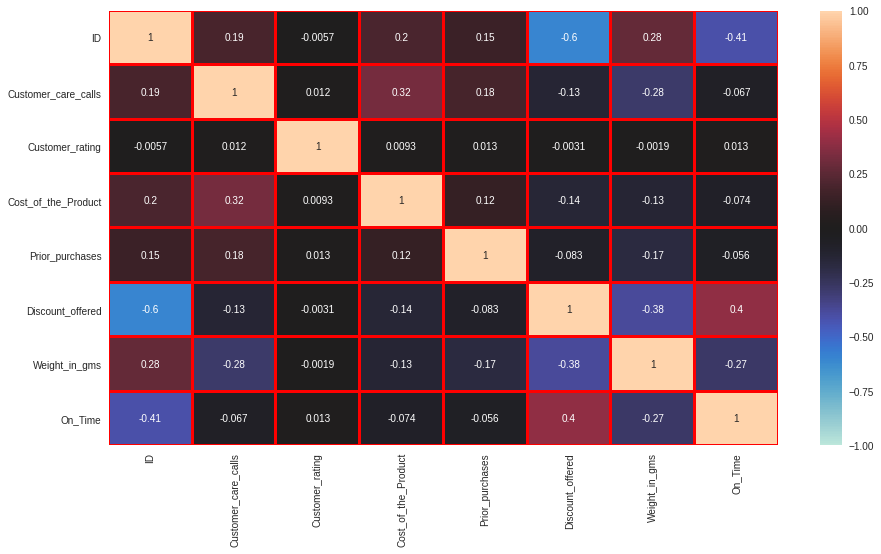

In [27]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(corrPearson,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="red")
plt.show()

##COVARIANCE

In [28]:
covariance = df.cov()

COVARIANCE VISUALIZATION

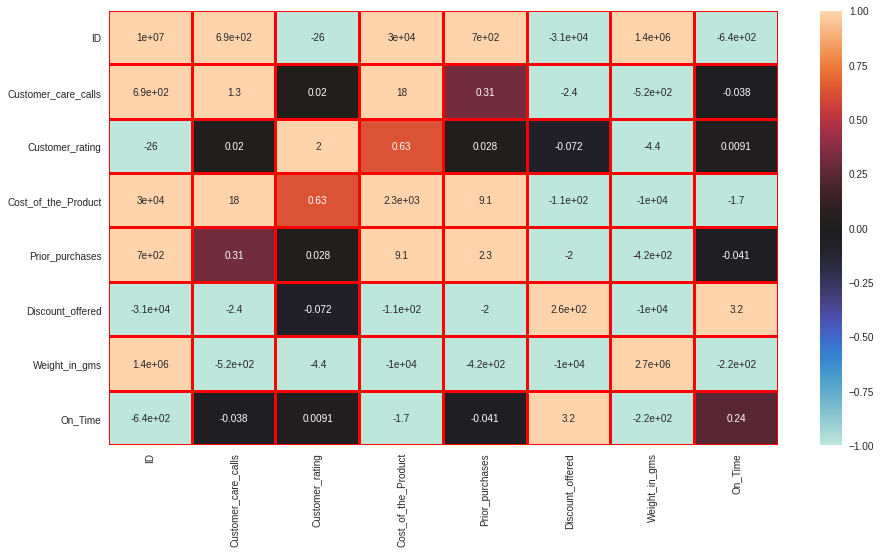

In [29]:
figure = plt.figure(figsize=(15,8))
sns.heatmap(covariance,annot=True,vmin=-1,center=0,vmax=1,linewidths=2,linecolor="red")
plt.show()

#ENCODE

In [30]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [31]:
objectcolumns = df.select_dtypes(include=["object"])
print(objectcolumns.columns)

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')


In [32]:
for i in objectcolumns:
    df[i] = encode.fit_transform(df[i])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   10999 non-null  int64
 1   Warehouse_block      10999 non-null  int64
 2   Mode_of_Shipment     10999 non-null  int64
 3   Customer_care_calls  10999 non-null  int64
 4   Customer_rating      10999 non-null  int64
 5   Cost_of_the_Product  10999 non-null  int64
 6   Prior_purchases      10999 non-null  int64
 7   Product_importance   10999 non-null  int64
 8   Gender               10999 non-null  int64
 9   Discount_offered     10999 non-null  int64
 10  Weight_in_gms        10999 non-null  int64
 11  On_Time              10999 non-null  int64
dtypes: int64(12)
memory usage: 1.0 MB


 # OUTLIER

In [34]:
df_for_outlier = df.copy()

In [35]:
from sklearn.neighbors import LocalOutlierFactor
loc = LocalOutlierFactor()

In [36]:
loc.fit_predict(df_for_outlier)

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
score = loc.negative_outlier_factor_

In [38]:
sortedscore = np.sort(score)

In [39]:
#checking outlier
sortedscore[0:50] # we can see 7 index as a point

array([-13.47550127, -13.2200499 , -13.17613056, -13.1176987 ,
       -12.78850567,  -9.89606519,  -8.82162598,  -8.74256217,
        -1.98015029,  -1.94815788,  -1.77397592,  -1.76261575,
        -1.73961855,  -1.73383247,  -1.60580734,  -1.55737526,
        -1.54231547,  -1.53248909,  -1.49348687,  -1.48347649,
        -1.45819068,  -1.44726191,  -1.41963149,  -1.41926478,
        -1.41899294,  -1.41775376,  -1.4171957 ,  -1.4167192 ,
        -1.41090053,  -1.40770046,  -1.40586538,  -1.40120756,
        -1.39583713,  -1.38879348,  -1.37632592,  -1.37230495,
        -1.37013826,  -1.36116499,  -1.35045708,  -1.34784318,
        -1.34394741,  -1.34209321,  -1.34197199,  -1.33258846,
        -1.32967763,  -1.31831642,  -1.31783683,  -1.31732901,
        -1.31678701,  -1.31671882])

In [40]:
point = sortedscore[7]
print(point)
print("---"*10)
print(df_for_outlier[score == point])

-8.742562173394253
------------------------------
      ID  Warehouse_block  ...  Weight_in_gms  On_Time
244  245                2  ...           6064        1

[1 rows x 12 columns]


In [41]:
outliers = score < point
print(df[outliers])
print("---"*20)
print(df[outliers].index)

      ID  Warehouse_block  ...  Weight_in_gms  On_Time
198  199                3  ...           7640        1
199  200                4  ...           7846        1
205  206                4  ...           7588        1
213  214                1  ...           7401        1
245  246                4  ...           7684        1
251  252                4  ...           6102        1
257  258                4  ...           6614        1

[7 rows x 12 columns]
------------------------------------------------------------
Int64Index([198, 199, 205, 213, 245, 251, 257], dtype='int64')


## Delete

In [42]:
outliersIndexList = [df[outliers].index]
print(type(outliersIndexList))

<class 'list'>


In [43]:
for d in outliersIndexList:
    df.drop(index=d,inplace=True)

#Visualization





In [44]:
dfvisual = df.copy()

In [45]:
dfvisual["Customer_rating"] = pd.Categorical(dfvisual["Customer_rating"])
dfvisual["Product_importance"] = pd.Categorical(dfvisual["Product_importance"])
dfvisual["Gender"] = pd.Categorical(dfvisual["Gender"])
dfvisual["On_Time"] = pd.Categorical(dfvisual["On_Time"])
dfvisual["Warehouse_block"] = pd.Categorical(dfvisual["Warehouse_block"])
dfvisual["Mode_of_Shipment"] = pd.Categorical(dfvisual["Mode_of_Shipment"])
dfvisual["Customer_care_calls"] = pd.Categorical(dfvisual["Customer_care_calls"])

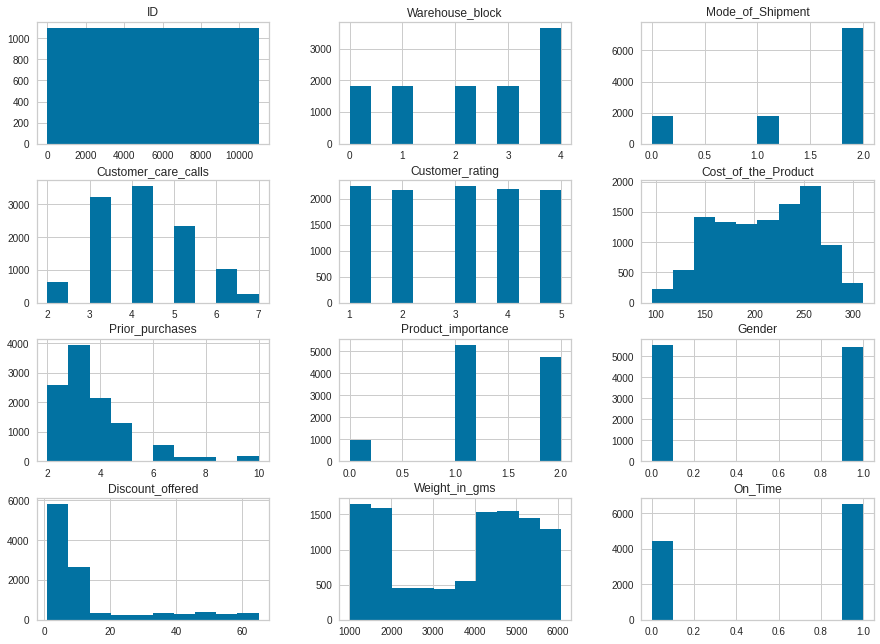

In [46]:
df.hist(figsize=(15,11))
plt.show()

<Figure size 1440x1440 with 0 Axes>

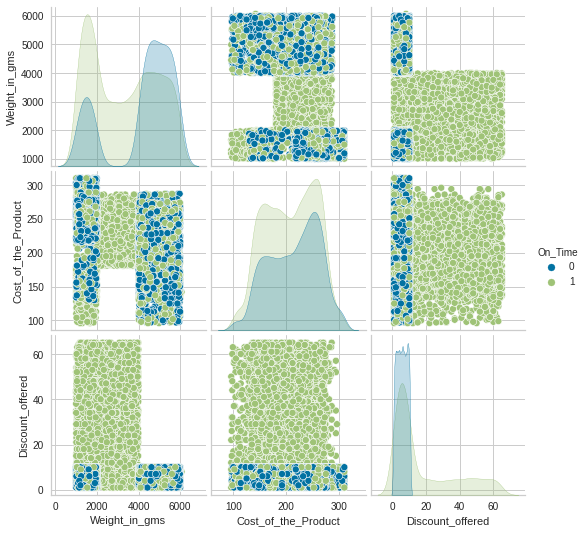

In [47]:
figure = plt.figure(figsize=(20,20))
sns.pairplot(dfvisual, hue='On_Time',vars=["Weight_in_gms","Cost_of_the_Product","Discount_offered"])
plt.show()

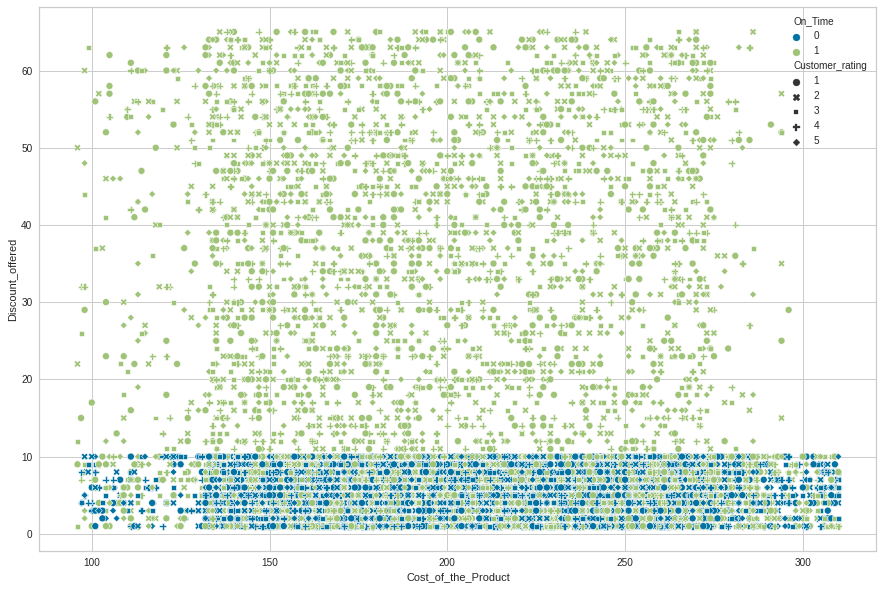

In [48]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="Cost_of_the_Product",y="Discount_offered",hue="On_Time",style="Customer_rating",
               data=dfvisual)
plt.show()

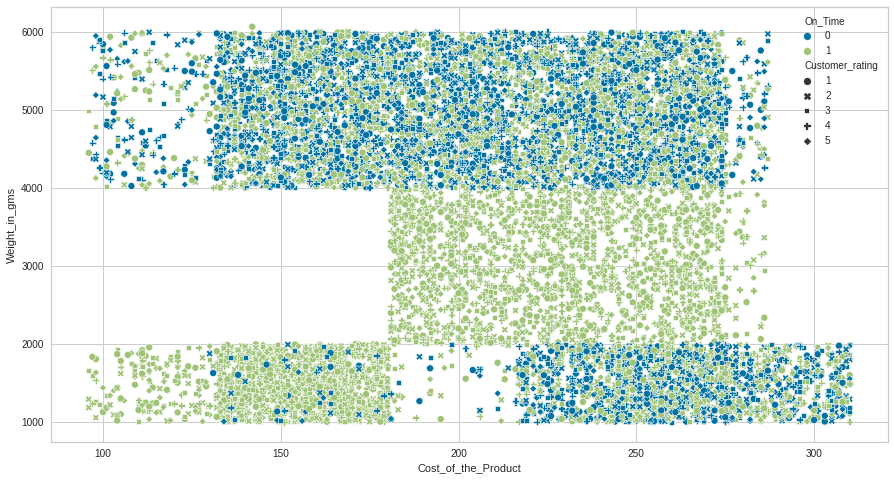

In [49]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="Cost_of_the_Product",y="Weight_in_gms",hue="On_Time",style="Customer_rating",
               data=dfvisual)
plt.show()

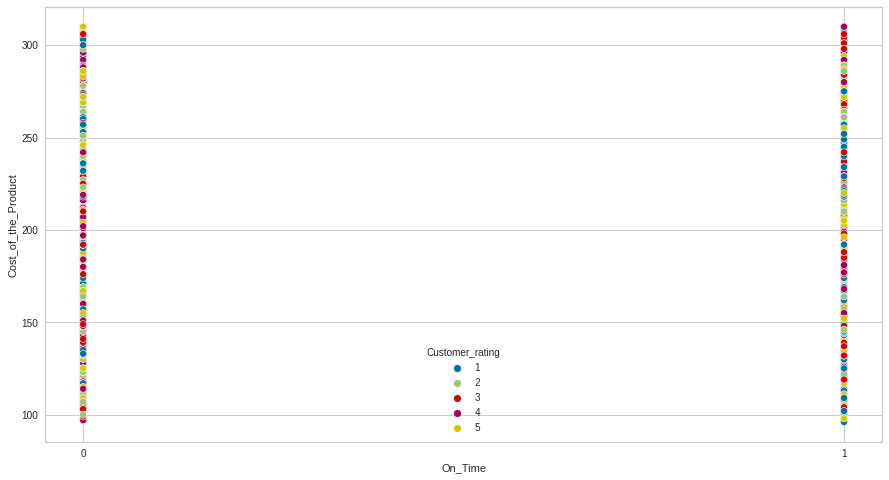

In [50]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="On_Time",y="Cost_of_the_Product",hue="Customer_rating",
               data=dfvisual)
plt.xticks([0,1])
plt.show()

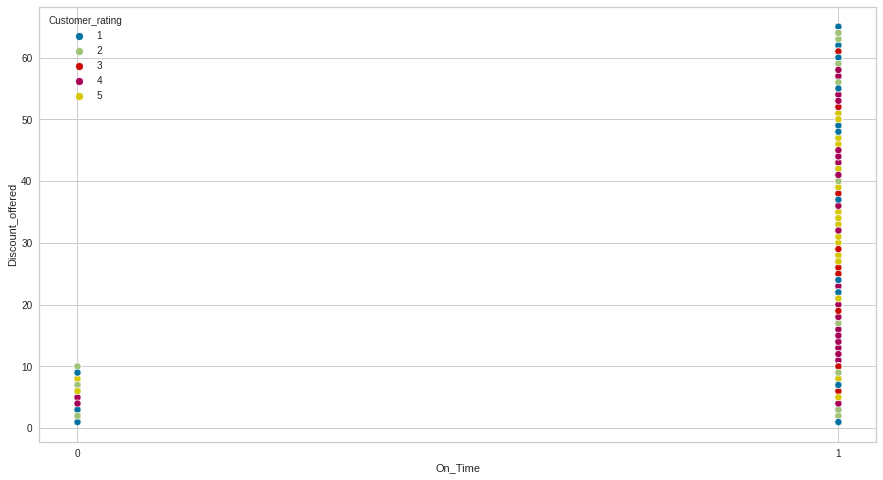

In [51]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="On_Time",y="Discount_offered",hue="Customer_rating",
               data=dfvisual)
plt.xticks([0,1])
plt.show()

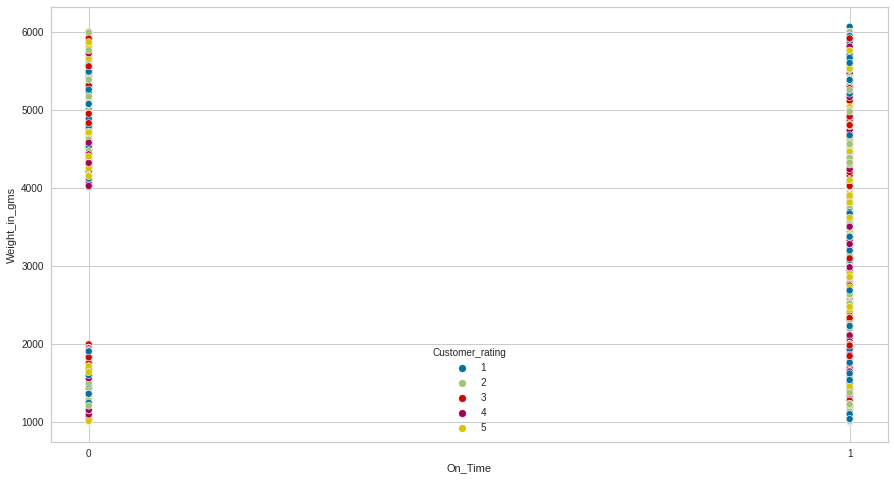

In [52]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="On_Time",y="Weight_in_gms",hue="Customer_rating",
               data=dfvisual)
plt.xticks([0,1])
plt.show()

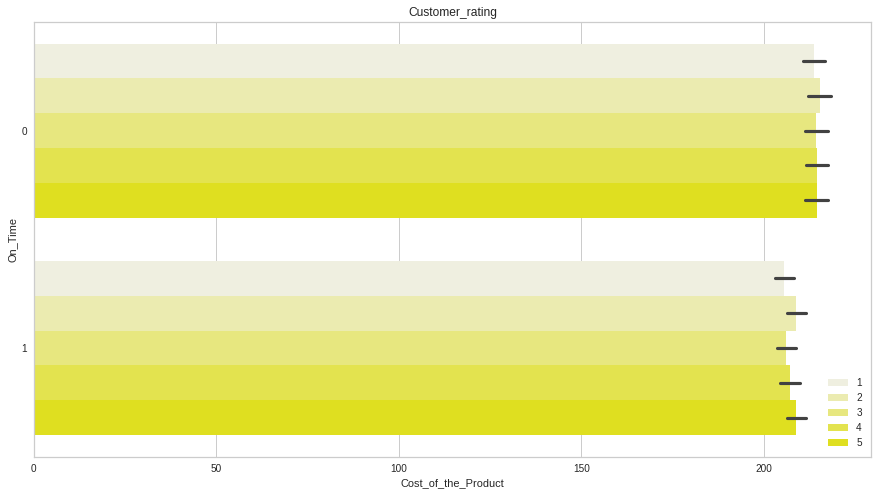

In [53]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Cost_of_the_Product",y="On_Time",
               data=dfvisual,color="yellow",hue="Customer_rating")
plt.title("Customer_rating")
plt.legend()
plt.show()

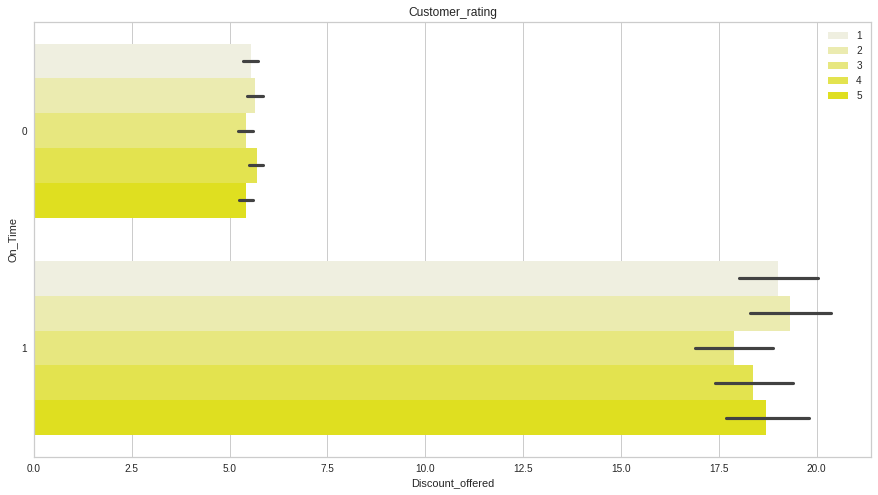

In [54]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Discount_offered",y="On_Time",
               data=dfvisual,color="yellow",hue="Customer_rating")
plt.title("Customer_rating")
plt.legend()
plt.show()

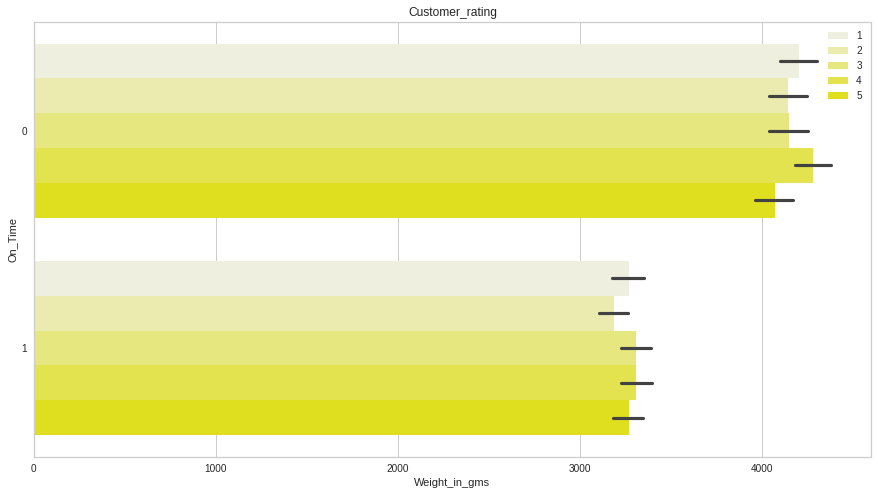

In [55]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Weight_in_gms",y="On_Time",
               data=dfvisual,color="yellow",hue="Customer_rating")
plt.title("Customer_rating")
plt.legend()
plt.show()

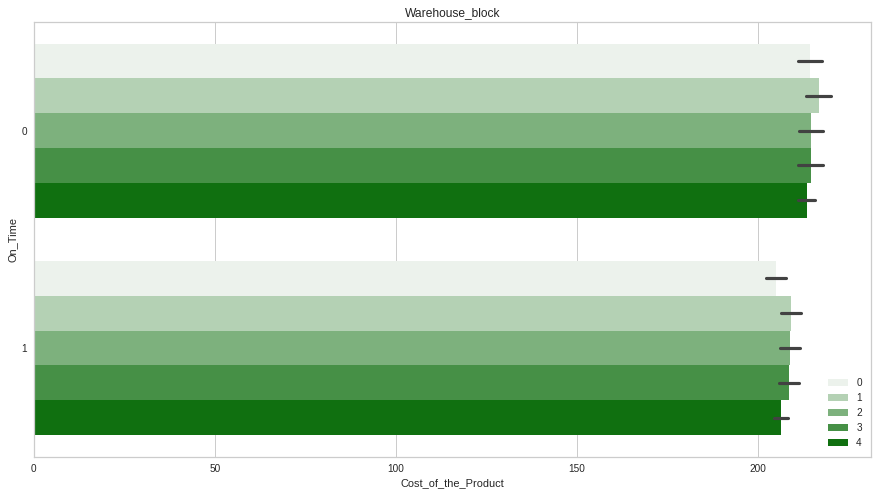

In [56]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Cost_of_the_Product",y="On_Time",
               data=dfvisual,color="green",hue="Warehouse_block")
plt.title("Warehouse_block")
plt.legend()
plt.show()

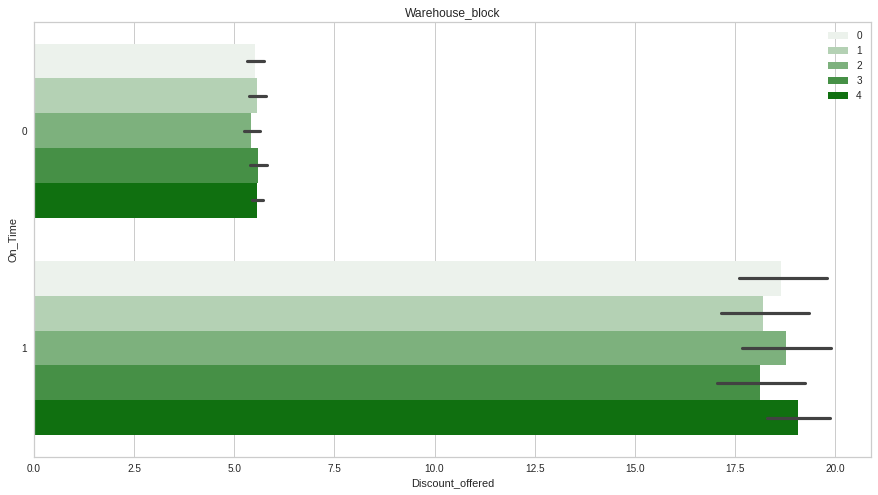

In [57]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Discount_offered",y="On_Time",
               data=dfvisual,color="green",hue="Warehouse_block")
plt.title("Warehouse_block")
plt.legend()
plt.show()

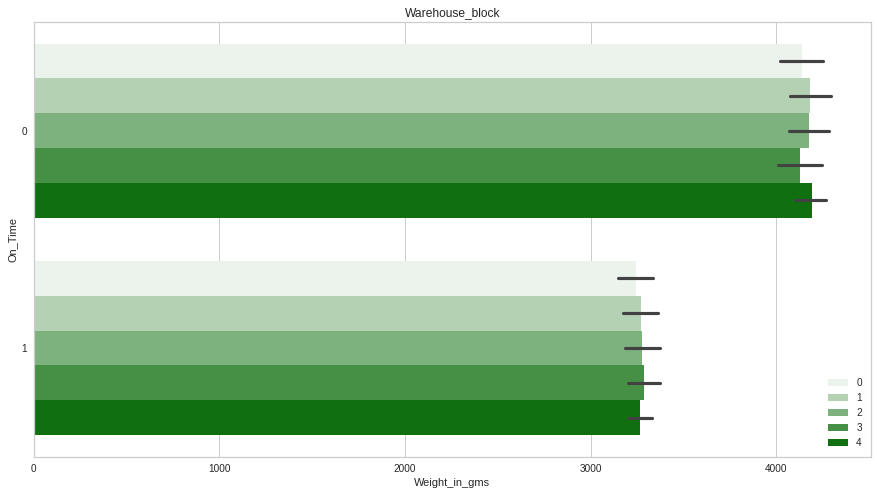

In [58]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Weight_in_gms",y="On_Time",
               data=dfvisual,color="green",hue="Warehouse_block")
plt.title("Warehouse_block")
plt.legend()
plt.show()

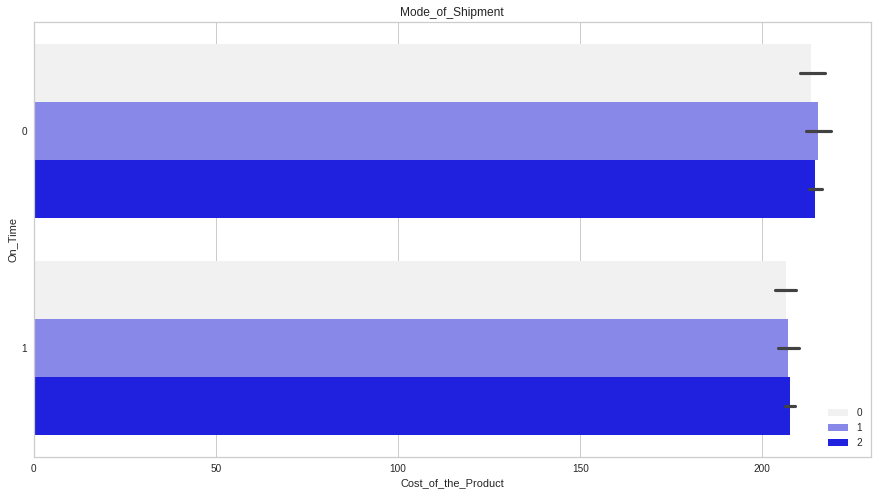

In [59]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Cost_of_the_Product",y="On_Time",
               data=dfvisual,color="blue",hue="Mode_of_Shipment")
plt.title("Mode_of_Shipment")
plt.legend()
plt.show()

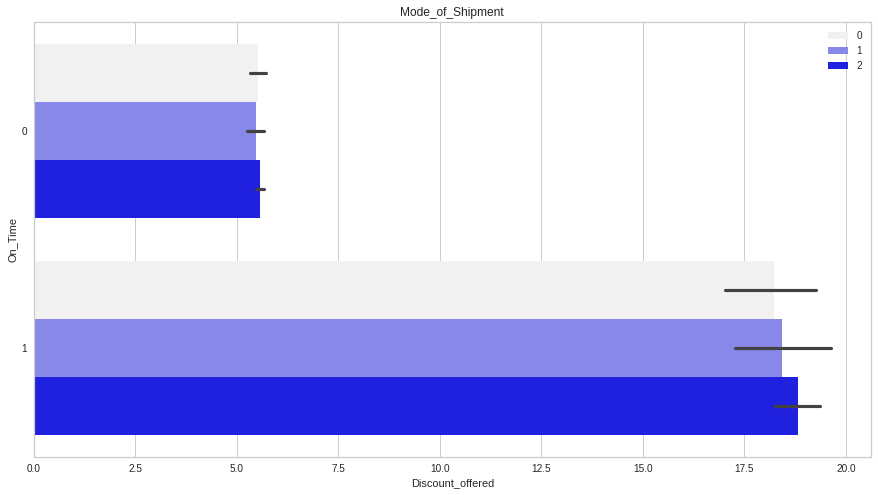

In [60]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Discount_offered",y="On_Time",
               data=dfvisual,color="blue",hue="Mode_of_Shipment")
plt.title("Mode_of_Shipment")
plt.legend()
plt.show()

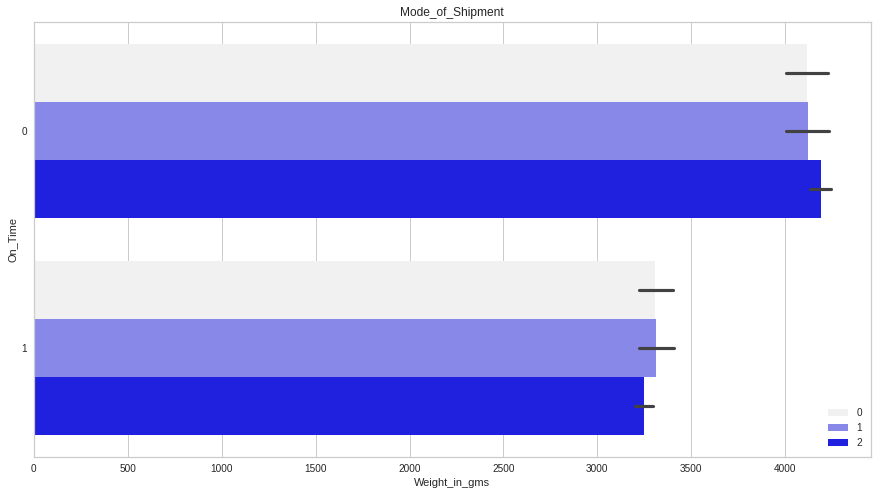

In [61]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Weight_in_gms",y="On_Time",
               data=dfvisual,color="blue",hue="Mode_of_Shipment")
plt.title("Mode_of_Shipment")
plt.legend()
plt.show()

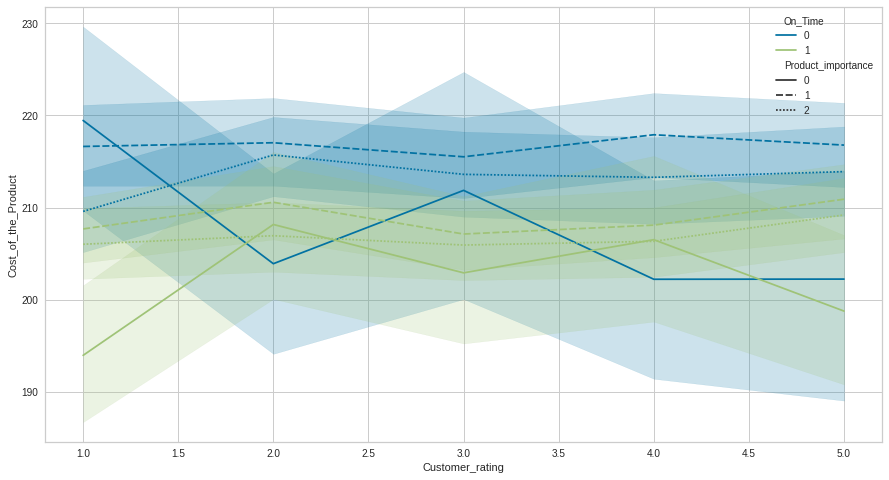

In [62]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Customer_rating",y="Cost_of_the_Product",hue="On_Time",style="Product_importance",data=dfvisual)
plt.show()

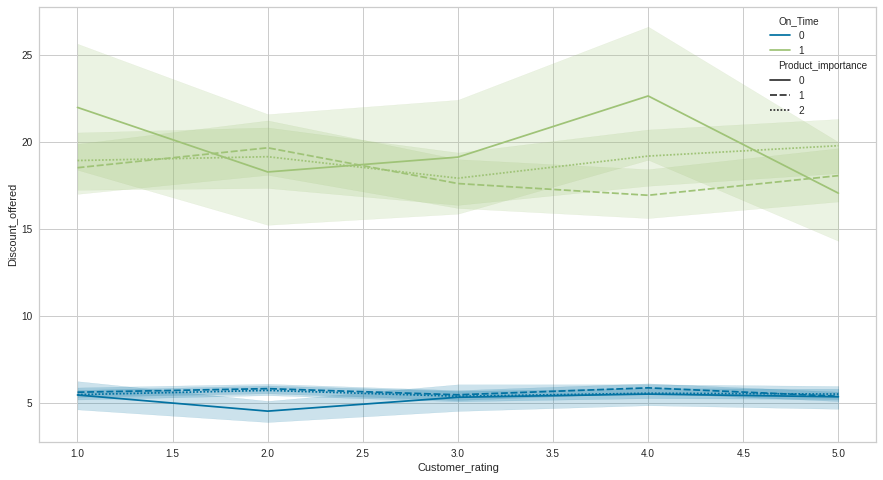

In [63]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Customer_rating",y="Discount_offered",hue="On_Time",style="Product_importance",data=dfvisual)
plt.show()

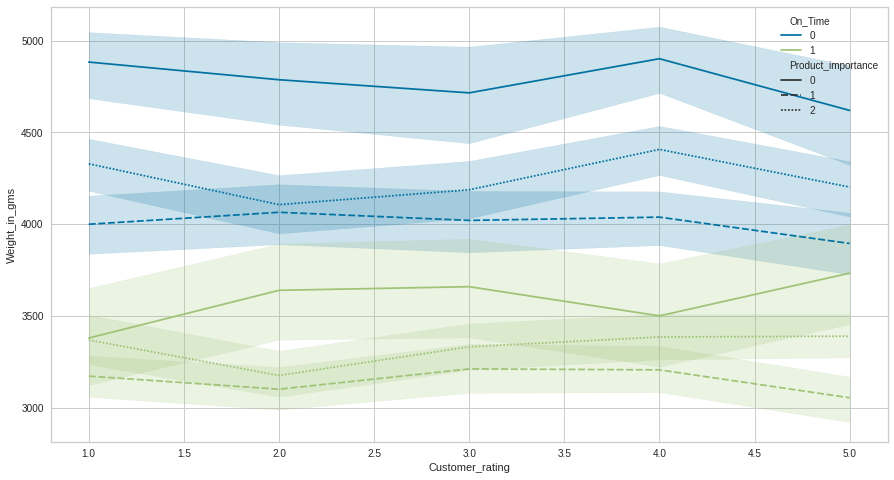

In [64]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Customer_rating",y="Weight_in_gms",hue="On_Time",style="Product_importance",data=dfvisual)
plt.show()

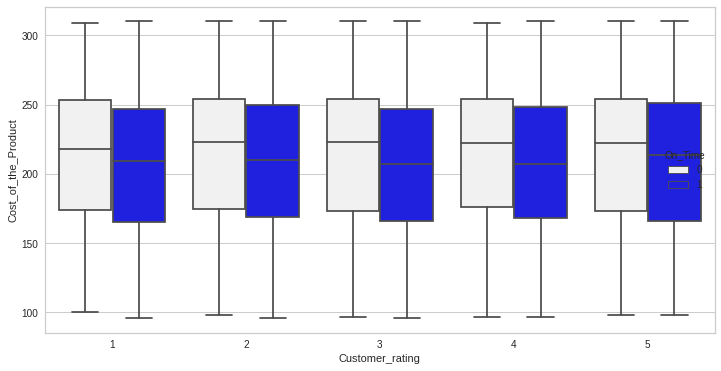

In [65]:
figure = plt.figure(figsize=(12,6))
sns.boxplot(x="Customer_rating",y="Cost_of_the_Product",hue="On_Time",color="blue",data=dfvisual)
plt.show()

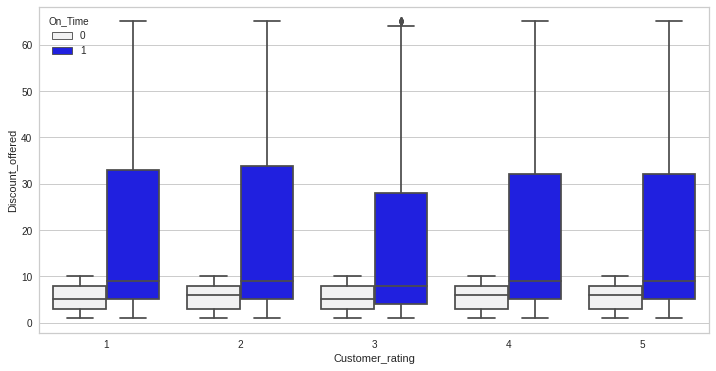

In [66]:
figure = plt.figure(figsize=(12,6))
sns.boxplot(x="Customer_rating",y="Discount_offered",hue="On_Time",color="blue",data=dfvisual)
plt.show()

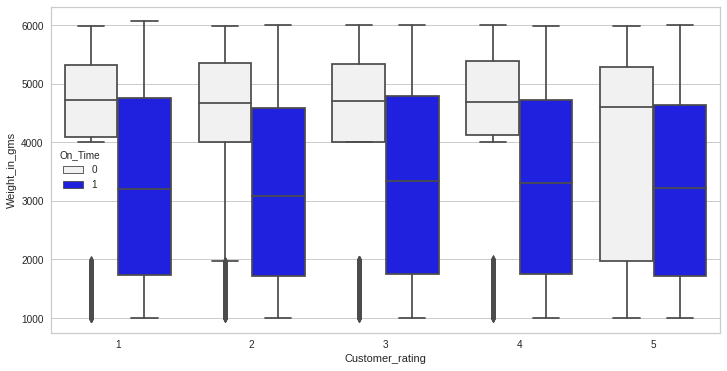

In [67]:
figure = plt.figure(figsize=(12,6))
sns.boxplot(x="Customer_rating",y="Weight_in_gms",hue="On_Time",color="blue",data=dfvisual)
plt.show()

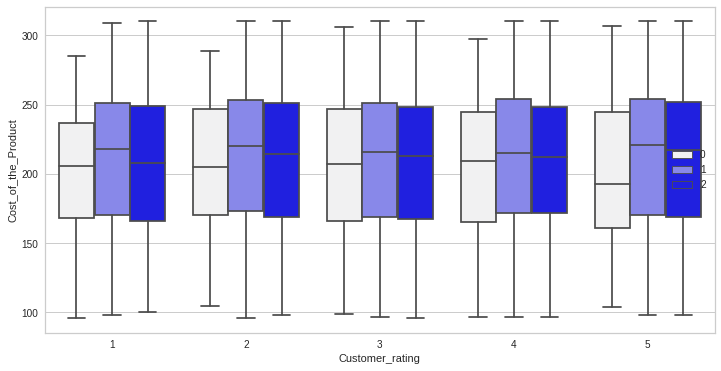

In [68]:
figure = plt.figure(figsize=(12,6))
sns.boxplot(x="Customer_rating",y="Cost_of_the_Product",hue="Product_importance",color="blue",data=dfvisual)
plt.legend()
plt.show()

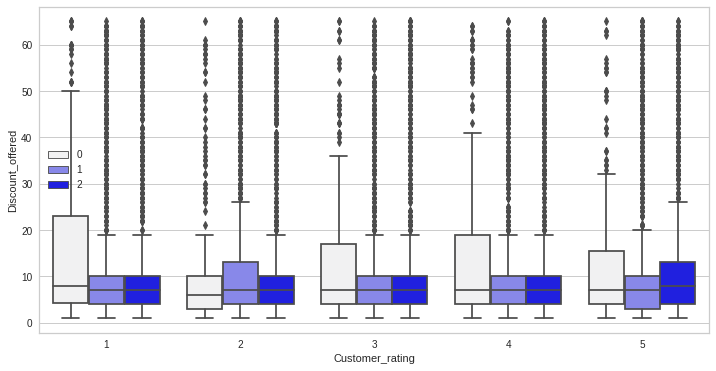

In [69]:
figure = plt.figure(figsize=(12,6))
sns.boxplot(x="Customer_rating",y="Discount_offered",hue="Product_importance",color="blue",data=dfvisual)
plt.legend()
plt.show()

We need to make discount and customer rating standardization

# STANDARDIZATION

In [70]:
import statsmodels.stats.api as sms

In [71]:
df["Customer_rating"].mean()

2.990538573508006

In [72]:
df["Customer_rating"].mode()

0    3
dtype: int64

In [73]:
print(sms.DescrStatsW(df["Customer_rating"]).tconfint_mean())

(2.964105707261418, 3.016971439754594)


In [74]:
def func(x):
    if x < 2.99:
        return "BAD"
    else:
        return "GOOD"

In [75]:
df["Customer_rating"] = df["Customer_rating"].map(lambda x : func(x))
df["Customer_rating"]

0         BAD
1        GOOD
2         BAD
3        GOOD
4         BAD
         ... 
10994     BAD
10995     BAD
10996    GOOD
10997     BAD
10998    GOOD
Name: Customer_rating, Length: 10992, dtype: object

In [76]:
df["Customer_rating"] = encode.fit_transform(df["Customer_rating"])

In [77]:
df["Customer_rating"].value_counts()

1    6595
0    4397
Name: Customer_rating, dtype: int64

In [78]:
#Discount_offered
df["Discount_offered"].mean()

13.362991266375547

In [79]:
df["Discount_offered"].mode()

0    10
dtype: int64

In [80]:
sms.DescrStatsW(df["Discount_offered"]).tconfint_mean()

(13.060066543410315, 13.665915989340778)

In [81]:
def funcforD(x):
    if x < 13.36:
        return "LESS"
    elif 13.36 < x > 30:
        return "NORMAL"
    else:
        return "TOO MUCH"

In [82]:
df["Discount_offered"] = encode.fit_transform(df["Discount_offered"])

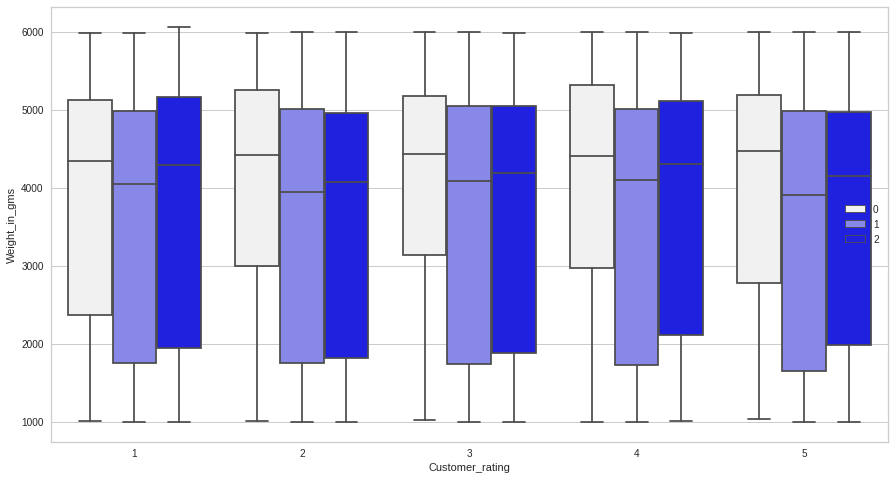

In [83]:
figure = plt.figure(figsize=(15,8))
sns.boxplot(x="Customer_rating",y="Weight_in_gms",hue="Product_importance",color="blue",data=dfvisual)
plt.legend()
plt.show()

No handles with labels found to put in legend.


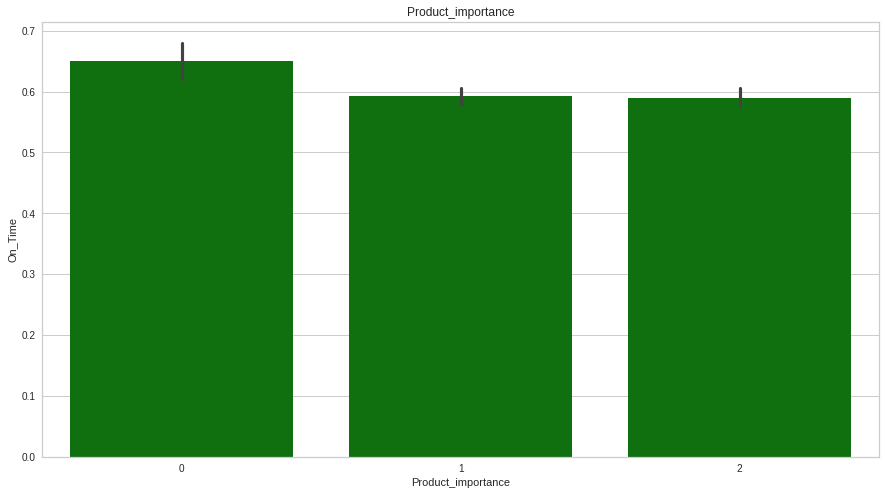

In [84]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Product_importance",y="On_Time",
               data=df,color="green")
plt.title("Product_importance")
plt.legend()
plt.show()

No handles with labels found to put in legend.


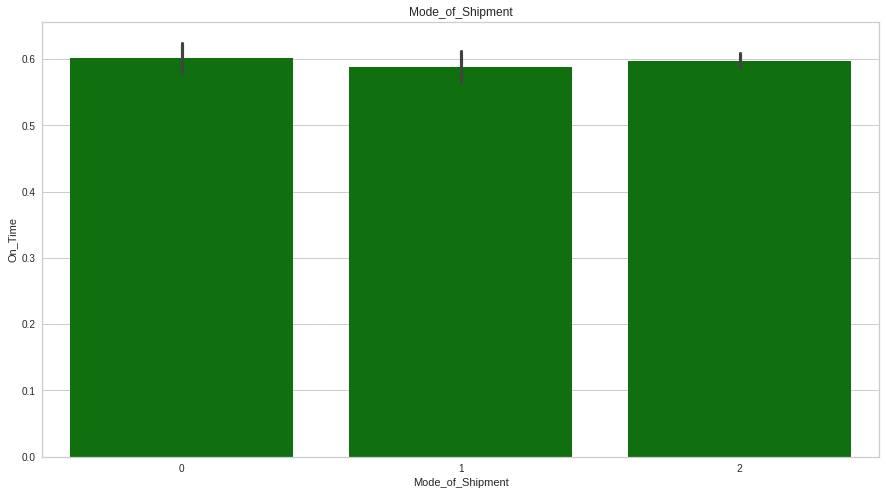

In [85]:
figure = plt.figure(figsize=(15,8))
sns.barplot(x="Mode_of_Shipment",y="On_Time",
               data=df,color="green")
plt.title("Mode_of_Shipment")
plt.legend()
plt.show()

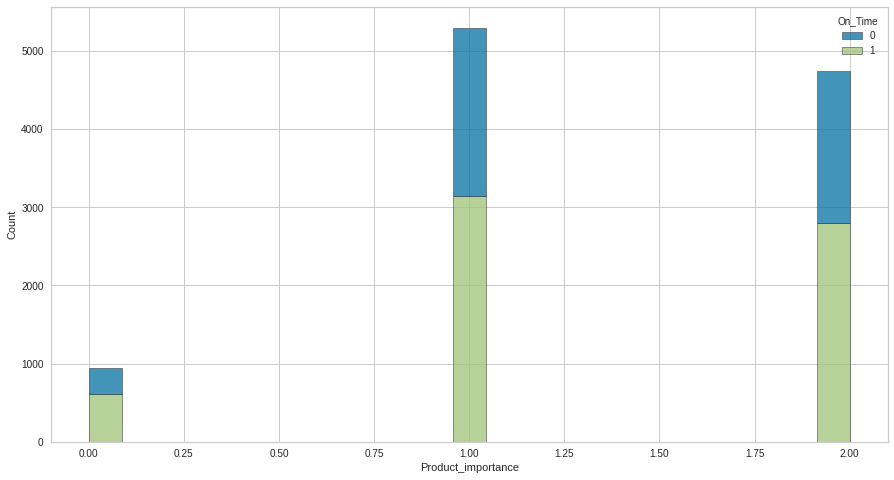

In [86]:
figure = plt.figure(figsize=(15,8))
sns.histplot(
    df,
    x="Product_importance", hue="On_Time",
    multiple="stack",
    edgecolor=".2",
    linewidth=.5,
)
plt.show()

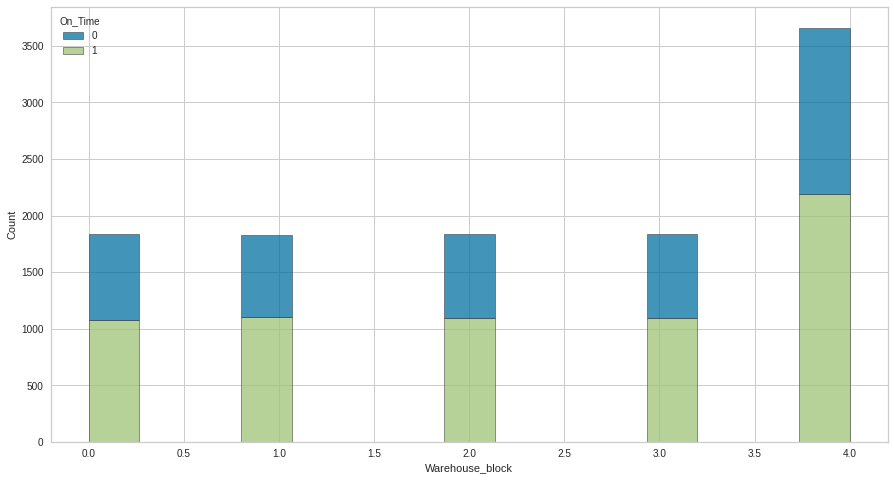

In [87]:
figure = plt.figure(figsize=(15,8))
sns.histplot(
    df,
    x="Warehouse_block", hue="On_Time",
    multiple="stack",
    edgecolor=".2",
    linewidth=.5,
)
plt.show()

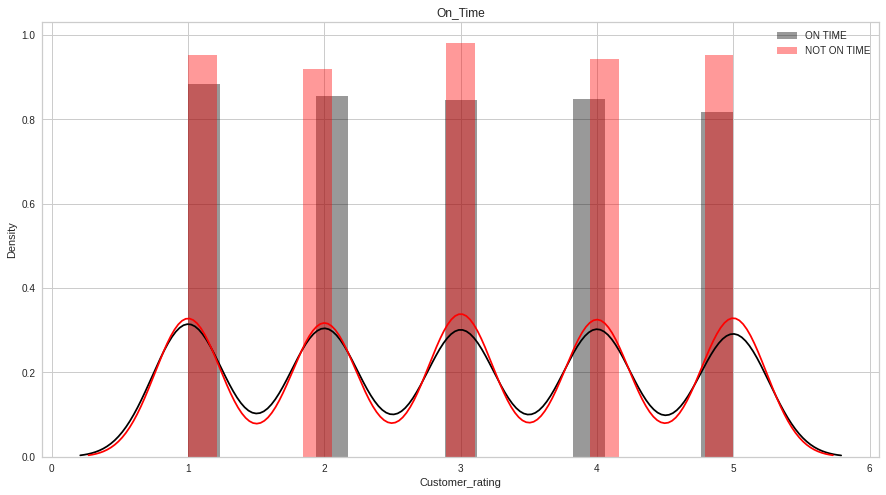

In [88]:
figure = plt.figure(figsize=(15,8))
sns.distplot(dfvisual[dfvisual['On_Time'] == 0]["Customer_rating"], color='black',label='ON TIME') 
sns.distplot(dfvisual[dfvisual['On_Time'] == 1]["Customer_rating"], color='red',label='NOT ON TIME')

plt.title('On_Time')
plt.legend()

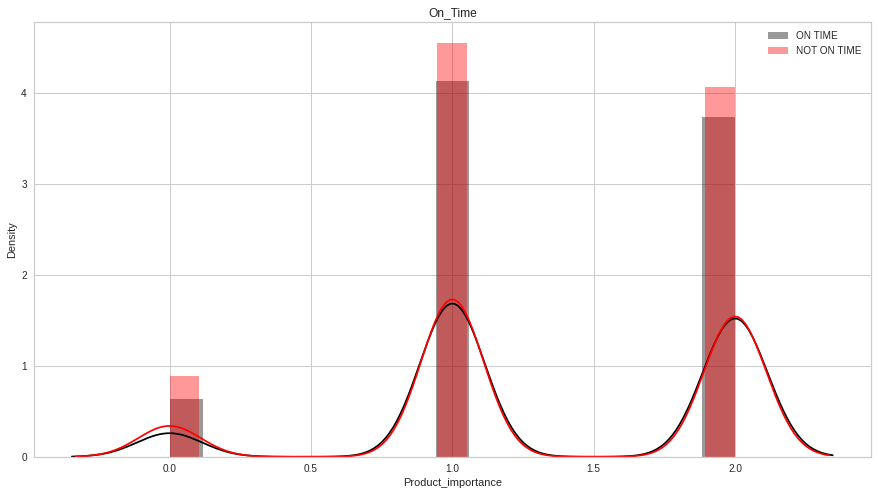

In [89]:
figure = plt.figure(figsize=(15,8))
sns.distplot(dfvisual[dfvisual['On_Time'] == 0]["Product_importance"], color='black',label='ON TIME') 
sns.distplot(dfvisual[dfvisual['On_Time'] == 1]["Product_importance"], color='red',label='NOT ON TIME')

plt.title('On_Time')
plt.legend()

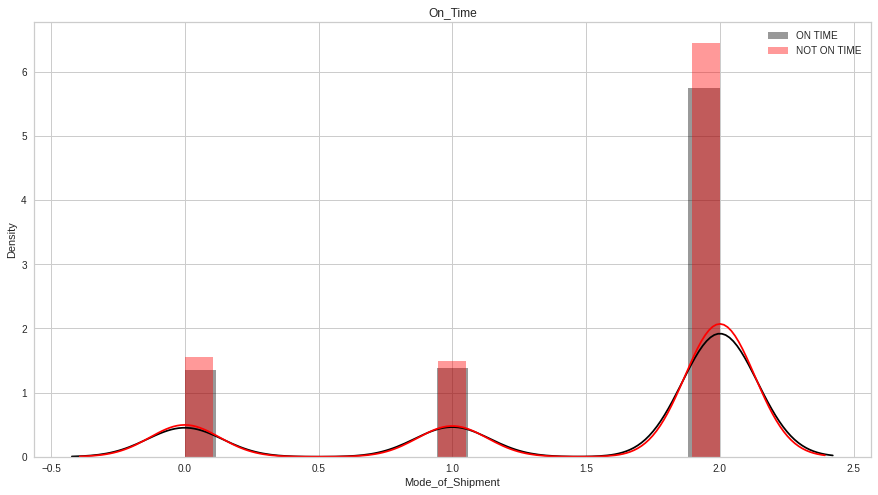

In [90]:
figure = plt.figure(figsize=(15,8))
sns.distplot(dfvisual[dfvisual['On_Time'] == 0]["Mode_of_Shipment"], color='black',label='ON TIME') 
sns.distplot(dfvisual[dfvisual['On_Time'] == 1]["Mode_of_Shipment"], color='red',label='NOT ON TIME')

plt.title('On_Time')
plt.legend()

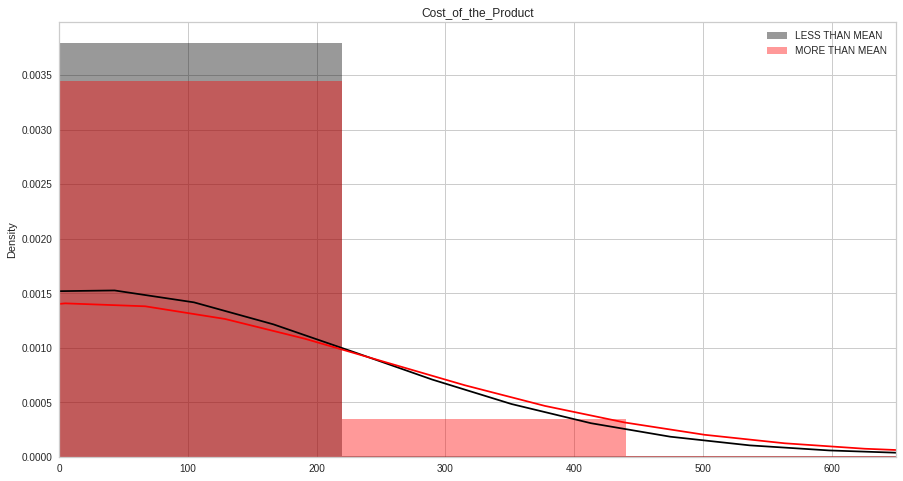

In [91]:
figure = plt.figure(figsize=(15,8))
sns.distplot(dfvisual[dfvisual['Cost_of_the_Product'] < dfvisual['Cost_of_the_Product'].mean()], color='black',label='LESS THAN MEAN') 
sns.distplot(dfvisual[dfvisual['Cost_of_the_Product'] > dfvisual['Cost_of_the_Product'].mean()], color='red',label='MORE THAN MEAN')

plt.xlim([0,650])
plt.title('Cost_of_the_Product')
plt.legend()

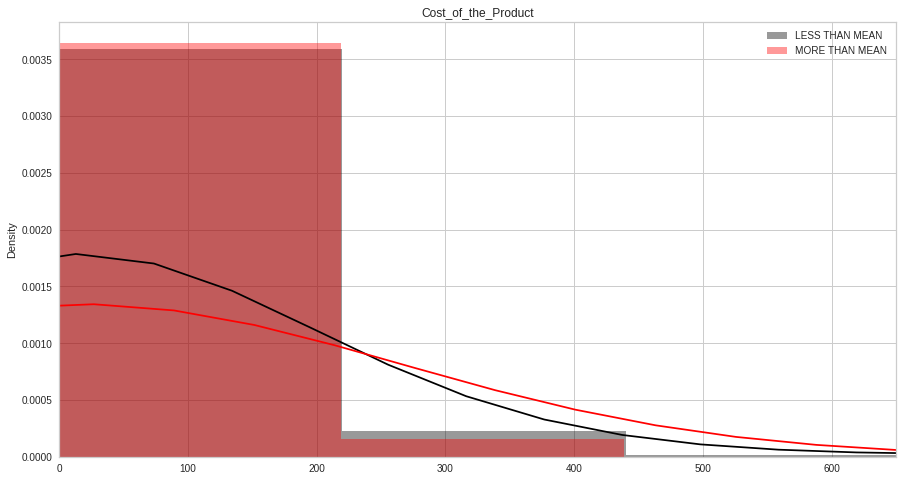

In [92]:
figure = plt.figure(figsize=(15,8))
sns.distplot(dfvisual[dfvisual['Weight_in_gms'] < dfvisual['Weight_in_gms'].mean()], color='black',label='LESS THAN MEAN') 
sns.distplot(dfvisual[dfvisual['Weight_in_gms'] > dfvisual['Weight_in_gms'].mean()], color='red',label='MORE THAN MEAN')

plt.xlim([0,650])
plt.title('Cost_of_the_Product')
plt.legend()

# TRAIN

In [93]:
#Id does not valued much for ML purpose we can drop ID from our dataset
df = df.drop(["ID"], axis = 1)
 

In [94]:
x = df.drop(['On_Time'], axis = 1)
y = df['On_Time']

In [95]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)

In [96]:
lj = LogisticRegression(solver="liblinear").fit(xTrain,yTrain)
gnb = GaussianNB().fit(xTrain,yTrain)
knnc = KNeighborsClassifier().fit(xTrain,yTrain)
cartc = DecisionTreeClassifier(random_state=42).fit(xTrain,yTrain)
rfc = RandomForestClassifier(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmc = GradientBoostingClassifier(verbose=False).fit(xTrain,yTrain)
xgbc = XGBClassifier().fit(xTrain,yTrain)
lgbmc = LGBMClassifier().fit(xTrain,yTrain)
catbc = CatBoostClassifier(verbose=False).fit(xTrain,yTrain)

In [97]:
modelsc = [lj,gnb,knnc,cartc,rfc,gbmc,xgbc,lgbmc,catbc]

In [98]:
for model in modelsc:
    name = model.__class__.__name__
    predict = model.predict(xTest)
    R2CV = cross_val_score(model,xTest,yTest,cv=10,verbose=False).mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()
    roc = roc_curve(yTest,predict)
    print(name + ": ")
    print("-" * 10)
    print("ACC-->",accuracy_score(yTest,predict))
    print("R2CV-->",R2CV)
    print("MEAN SQUARED ERROR-->",np.sqrt(error))
    print("ROC-->",roc)
    print("-" * 30)

LogisticRegression: 
----------
ACC--> 0.6443838108231014
R2CV--> 0.639821502698215
MEAN SQUARED ERROR--> 0.6001487293178125
ROC--> (array([0.        , 0.40681818, 1.        ]), array([0.        , 0.67854435, 1.        ]), array([2, 1, 0]))
------------------------------
GaussianNB: 
----------
ACC--> 0.654843110504775
R2CV--> 0.6562121212121212
MEAN SQUARED ERROR--> 0.5863342722269259
ROC--> (array([0.        , 0.01363636, 1.        ]), array([0.        , 0.43366187, 1.        ]), array([2, 1, 0]))
------------------------------
KNeighborsClassifier: 
----------
ACC--> 0.6625738972260118
R2CV--> 0.6348339559983396
MEAN SQUARED ERROR--> 0.6042897020483308
ROC--> (array([0.        , 0.36136364, 1.        ]), array([0.        , 0.67854435, 1.        ]), array([2, 1, 0]))
------------------------------
DecisionTreeClassifier: 
----------
ACC--> 0.6571168713051387
R2CV--> 0.6371149854711498
MEAN SQUARED ERROR--> 0.6023993812487278
ROC--> (array([0.   , 0.425, 1.   ]), array([0.        , 0.

XGB Classifier is best having 0.68 ACC

Hyper Paramenter Tuning for XGB Classifier

In [99]:
paramsLR = {"learning_rate": [0.001, 0.01, 0.1, 0.2]}

In [100]:
cv = GridSearchCV(xgbc,paramsLR,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cv.best_params_)

{'learning_rate': 0.01}


In [101]:
xgbcL = XGBClassifier(learning_rate=0.1).fit(xTrain,yTrain)

R2CVL = cross_val_score(xgbcL,xTest,yTest,cv=10).mean()
errorL = -cross_val_score(xgbcL,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CVL)
print(np.sqrt(errorL))

0.6571170610211705
0.5855620709872091


In [102]:
paramsMD = {"max_depth": [3, 5, 8, 50, 100]}

In [103]:
cvMD = GridSearchCV(xgbc,paramsMD,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cvMD.best_params_)

{'max_depth': 3}


In [104]:
xgbcMD =XGBClassifier(max_depth=3).fit(xTrain,yTrain)

R2CVMD = cross_val_score(xgbcMD,xTest,yTest,cv=10).mean()
errorMD = -cross_val_score(xgbcMD,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()

print(R2CVMD)
print(np.sqrt(errorMD))

0.6571170610211705
0.5855620709872091


In [105]:
paramsE = {"n_estimators": [200, 500, 1000, 2000]}

In [106]:
cvE = GridSearchCV(xgbc,paramsE,cv=10,verbose=False,n_jobs=-1).fit(xTrain,yTrain)
print(cvE.best_params_)

{'n_estimators': 200}


In [107]:
xgbcE = XGBClassifier(n_estimators=200,verbose=False).fit(xTrain,yTrain)

R2CVE = cross_val_score(xgbcE,xTest,yTest,cv=10,verbose=False).mean()
errorE = -cross_val_score(xgbcE,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CVE)
print(np.sqrt(errorE))

0.6434661685346617
0.5971045398130367


In [108]:
xgbcGen = XGBClassifier(n_estimators=200,max_depth=3,learning_rate=0.1,verbose=False).fit(xTrain,yTrain)

R2CGE = cross_val_score(xgbcGen,xTest,yTest,cv=10,verbose=False).mean()
errorGE = -cross_val_score(xgbcGen,xTest,yTest,cv=10,scoring="neg_mean_squared_error",verbose=False).mean()

print(R2CGE)
print(np.sqrt(errorGE))

0.6434661685346617
0.5971045398130367


In [109]:
predict = xgbcGen.predict(xTest)
print("ACC-->",accuracy_score(yTest,predict))

ACC--> 0.6766712141882674
